In [31]:
import pandas as pd

#Graphing Libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

df = pd.read_csv('comments_with_sentiment_counts.csv')


df.to_csv('sentiment_counts_by_date.csv')

df.drop(['Unnamed: 0','score','controversiality','Positive','Neutral'],axis=1,inplace=True)

df.head()

,created_utc,Negative
0,2018-03-01,51
1,2018-03-02,37
2,2018-03-03,33
3,2018-03-04,32
4,2018-03-05,28


In [42]:
#df2 = df.assign(Neg_Rolling = lambda x: x['Negative'].rolling(window=21).mean()).copy()
df2 = df.assign(Neg_Rolling = lambda x: x['Negative'].rolling(window=21).mean(),
               Average = lambda x: x['Negative'].mean(),
                Roll7 = lambda x: x['Negative'].rolling(window=7).mean(),
               ).copy()
df3 = df2.assign(Diff = lambda x:x['Negative'] - x['Neg_Rolling'])

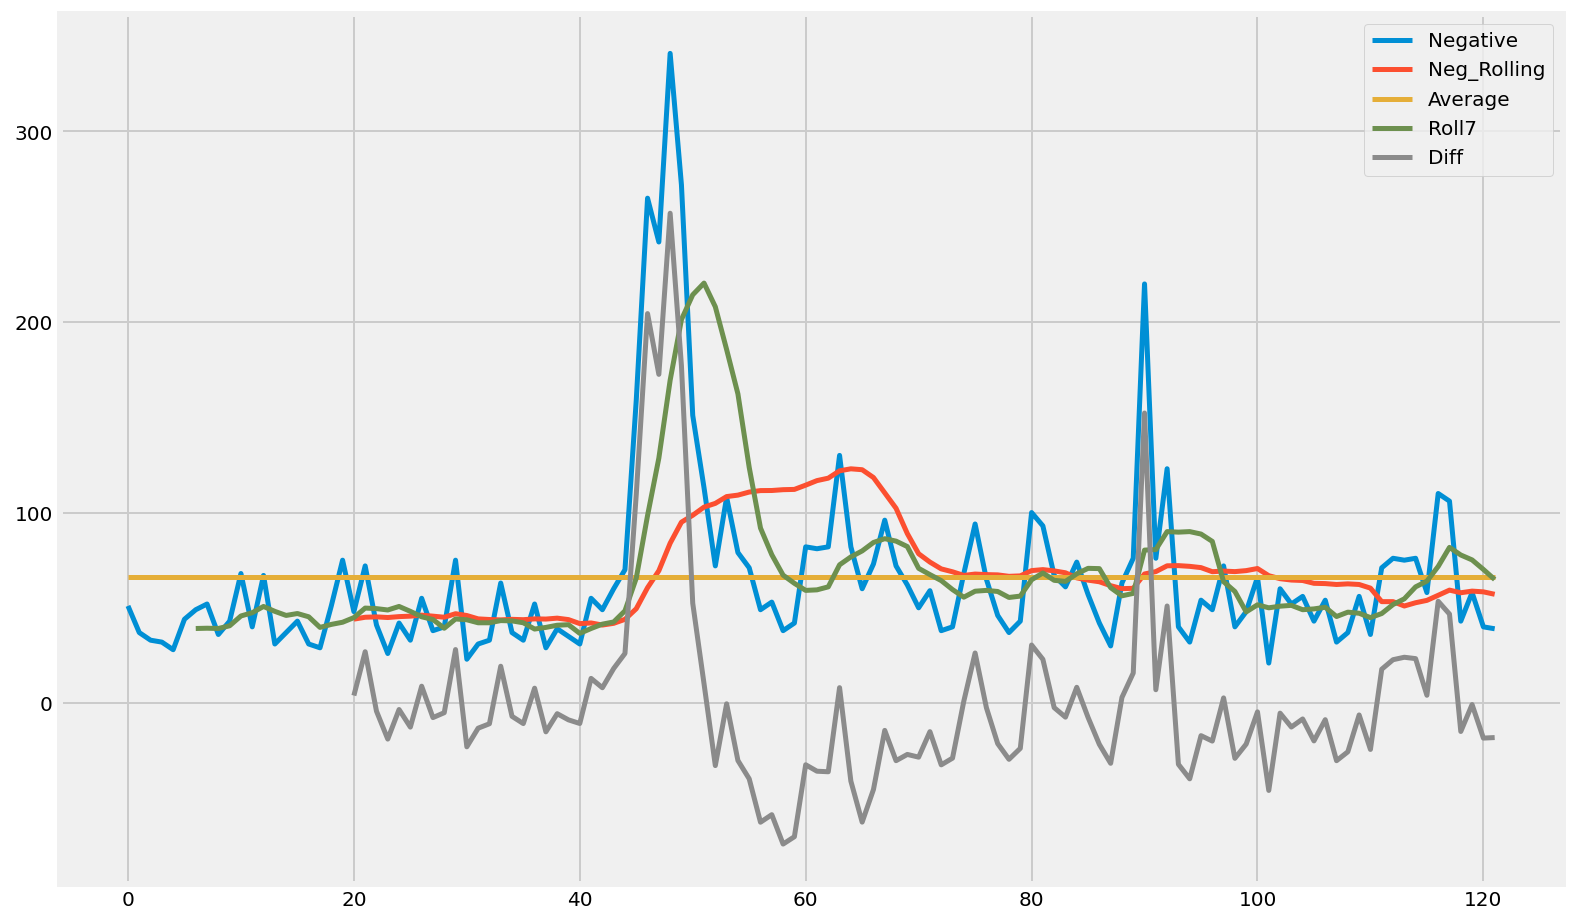

In [43]:


df3.plot(lw=2.5,figsize=(12,8))
plt.show()

In [34]:
df?
http://localhost:8888/?token=17168cab5bd8bee9b5db772b1da1dda08de4cc35f36d6c1cz


In [22]:
from matplotlib.dates import AutoDateLocator
from matplotlib.dates import ConciseDateFormatter

locator = AutoDateLocator()
formatter = ConciseDateFormatter(locator)

In [24]:
# All Discussion Threads

df_plot = df3.copy()

plt.figure(figsize=(12,8)) 
plt.plot(df_plot['created_utc'],df_plot["Negative"],  df_plot["Neg_Rolling"],  df_plot["Diff"])
plt.legend(loc='upper left')

ax = plt.gca()
trans = ax.get_xaxis_transform()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


plt.ylabel('Number of Comments')
plt.margins(0,0)
plt.title('Sentiment Counts by Date \n(All discussions)')

plt.show()


No handles with labels found to put in legend.


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units